# Three Math Games

### Python Imports

In [22]:
from IPython import display
import IPython.display as display
from IPython.display import clear_output
from ipywidgets import interactive
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from sympy import *
import time

## Scatterplot Game


  - Randomly generate points on a graph and the player has to input the (x,y) coordinates
  - For added difficulty, make the graph larger


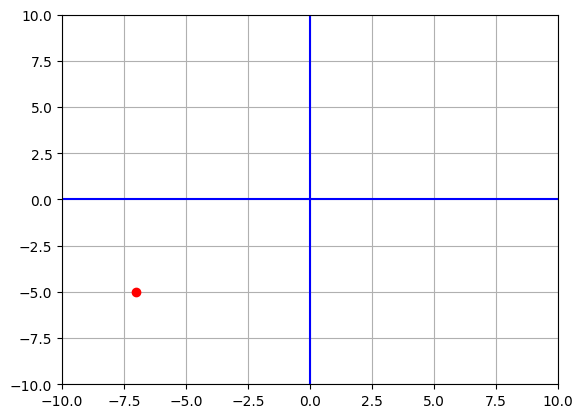

Enter the coordinates of the red point point: 
-7, -5
You guessed correctly!


In [ ]:
xmin = -10
xmax = 10
ymin = -10
ymax = 10


xpoint = random.randint(xmin, xmax)
ypoint = random.randint(ymin, ymax)
x = [xpoint]
y = [ypoint]

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.plot(x, y, 'ro')
print(" ")
plt.grid() # displays grid lines on graph
plt.show()
guess = input("Enter the coordinates of the red point point: \n")
guess_array = guess.split(",")
xguess = int(guess_array[0])
yguess = int(guess_array[1])
if xguess == xpoint and yguess == ypoint:
  print('You guessed correctly!')
else:
  print('Incorrect, try again.')


## Algebra Practice Game


  - Generate one-step and two-step problems with random integer values and the player has to input the answer
  - Use positive and negative values. For added difficulty, make the numbers larger


In [ ]:
def generate_equation(eq_type, max):
    x = symbols('x')
    operators = ['+', '-', '*', '/']
    solution = random.randint(-max, max)
    while solution == 0:
        solution = random.randint(-max, max)

    if eq_type == 0:  # One-step equation
        num = random.randint(-max, max)
        op = random.choice(operators)
        print_string = f'x {op} {num} = {solution}'
        equation_zero_form = f'x {op} {num} - {solution} = 0'
        equation = sympify(f'x {op} {num} - {solution}')

    elif eq_type == 1:  # Two-step equation
        num1 = random.randint(-max, max)
        num2 = random.randint(-max, max)
        op1 = random.choice(operators)
        op2 = random.choice(operators)
        print_string = f'{num1} {op1} x {op2} {num2} = {solution}'
        equation_zero_form = f'{num1} {op1} x {op2} {num2} - {solution} = 0'
        equation = sympify(f'{num1} {op1} x {op2} {num2} - {solution}')

    return equation, print_string, equation_zero_form, max

def solve_and_print(equation, print_string, equation_zero_form, max):
    x = symbols('x')
    solution = solve(equation, x)
    if not solution:
        #print('Non solution')
        return max
    decimal_solution = round(float(N(solution[0])), 4)
    #print(solution[0], ',', decimal_solution)
    print("\nSolve for x by fraction or number rounded to 4 decimal places.")
    print("[Example: x= 4/9 ,or x= 0.4444]")
    print(print_string)
    answer = input("x=")
    clear_output(wait=True)  # Clear the output before printing the new problem
    try:
        if round(float(eval(answer)), 4) == decimal_solution:
            print("\nCorrect!")
            max += 1
            print(f"Increasing difficulty to : {max}")
        else:
            print("\nIncorrect. Here is the solution:")
            print(print_string)
            print(equation_zero_form)
            print(f'{equation} = 0')
            print(f"x = {solution[0]}, {decimal_solution}")
            max -= 1
            print(f"Decreasing difficulty to: {max}")
    except Exception as e:
        print("Please enter a valid solution.")
    return max

def play():
  max = 5
  win = 15
  while max > 0 and max < win+1:
    eq_type = random.randint(0, 1)
    equation, print_string, equation_zero_form, max = generate_equation(eq_type, max)
    max = solve_and_print(equation, print_string, equation_zero_form, max)
  if max == 0:
    print("\nGame over.")
  else:
    print("\nYou win!")
play()


Correct!
Increasing difficulty to : 16

You win!


## Projectile Game



  - Display a "wall" with random height and location. Player has to move sliders to adjust a parabolic path to clear the wall
  - For added difficulty, make a second level where players enter a, b, and c without sliders


### Level 1 - Sliders

In [49]:
%matplotlib inline
from ipywidgets import interactive
import IPython.display as display

#Wall:
# Between points 10 and 15
# Max height of 100
wall_pos = random.randint(10,15)
wall_height = random.randint(25,100)

def f(a, b, c):
    points = 1000
    # Roots
    d = b**2 - 4 * a * c
    if d >= 0:
        root_1 = (-b + math.sqrt(d)) / (2 * a)
        root_2 = (-b - math.sqrt(d)) / (2 * a)
        xmin = min(root_1, root_2) - 1  # Add some padding
        xmax = max(root_1, root_2) + 1  # Add some padding
    else:
        xmin = -10
        xmax = 10

    x = np.linspace(xmin, xmax, points)

    # Parabola
    y1 = a * x**2 + b * x + c

    # Vertex
    vx = -b / (2 * a)
    vy = a * (vx**2) + b * vx + c

    if d >= 0:
        #ymin = -int(vy)
        ymin = -1
        ymax = int(vy) * 2
    else:
        ymin = -1
        ymax = max(y1) + 1

    # Make sure the wall is always on display
    if xmax < wall_pos + 1:
      xmax = wall_pos + 1

    plt.figure(figsize=(8, 6))
    plt.plot(x, y1, linestyle='--', label='Trajectory')  # plot parabola
    plt.axhline(0, color='blue', lw=1)  # x axis
    plt.axvline(0, color='blue', lw=1)  # y axis
    plt.plot([wall_pos, wall_pos], [0, wall_height], color='red', label='Wall')
    #plt.plot([vx], [vy], 'ro', label='Vertex')  # plot vertex

    if d >= 0:
        plt.plot([root_1], [0], 'go', label='Start')  # plot roots
        plt.plot([root_2], [0], 'rx', label='End')

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.legend()

    # Display win or loss
    wall_index = np.searchsorted(x, wall_pos)
    if wall_index < len(x) and y1[wall_index] >= wall_height:
        h1 = f'Win!'
    else:
        h1 = f'Keep Trying!'
    plt.title(h1)
    plt.show()

# Interactive creates sliders for a, b, and c values passed to function f
interactive_plot = interactive(f, a=(-9, -1), b=(0, 100), c=(-100, 100))
display.display(interactive_plot)

interactive(children=(IntSlider(value=-5, description='a', max=-1, min=-9), IntSlider(value=50, description='b…

### Level 2 - No Sliders

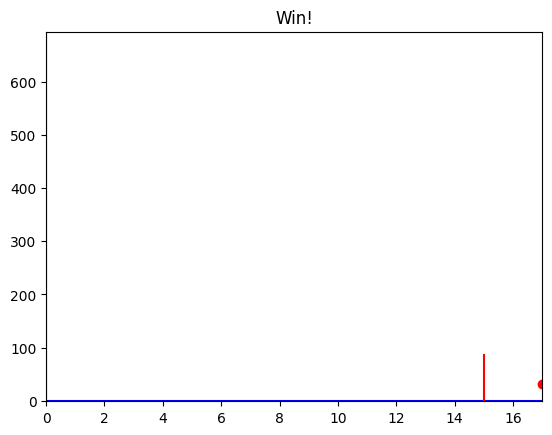

None

In [72]:
def start_game():
  wall_x = random.randint(10,15)
  wall_y = random.randint(25,100)
  print(f'The wall is located at x: {wall_x} and is {wall_y} high.')
  a = float(input("Enter a value:"))
  b = float(input("Enter b value:"))
  c = float(input("Enter c value:"))
  if a < 0:
    make_shot(a, b, c, wall_x, wall_y)
  else:
    print("Please enter an 'a' value less than 0!")

def make_shot(a, b, c, wall_x, wall_y):
  # Change vx and vy to represent the vertex
  vx = -b/(2*a)
  vy = a*vx**2 + b*vx + c
  d = b**2 - 4*a*c
  if d>=0:
    root_1 = (-b + math.sqrt(d))/(2*a)
    root_2 = (-b - math.sqrt(d))/(2*a)

  # Also change the following dimensions to display the vertex
  xmin = int(root_1)
  xmax = int(root_2)
  ymin = -1
  ymax = int(vy)*2

  if xmax < wall_x + 1:
    xmax = wall_x + 1

  points = 2*(xmax-xmin)
  x = np.linspace(xmin,xmax,points)
  y = a*x**2 + b*x + c

  # Create a boolean mask for values greater than or equal to zero
  mask = y >= 0

  # Apply the mask to x and y to keep only non-negative values
  x_trimmed = x[mask]
  y_trimmed = y[mask]

  for i in range(len(x_trimmed)):
    fig, ax = plt.subplots()
    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'b') # blue x axis
    plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
    plt.plot([wall_x, wall_x],[0,wall_y],'r') #plot the wall
    plt.plot([x_trimmed[i]],[y_trimmed[i]],'ro') # plot the projectile
    # Check for win or loss
    wall_index = np.searchsorted(x_trimmed, wall_x)
    if wall_index < len(x_trimmed) and y_trimmed[wall_index] >= wall_height:
        h1 = f'Win!'
    else:
        h1 = f'Keep Trying!'
    plt.title(h1)
    display.display(plt.show())
    time.sleep(0.1)
    display.clear_output(wait=True)

start_game()